#### Collecting tweets using tweepy for topics nobel, bcci, oneChicago and theMaskedSinger

In [1]:
import os
import copy
import datetime
import warnings

import numpy as np
import pandas as pd
import keras

from matplotlib import pyplot as plt

from wordcloud import WordCloud


import spacy
nlp = spacy.load('en')
nlp.remove_pipe('parser')
nlp.remove_pipe('ner')

import gensim

C:\Users\Abhis\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [72]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [73]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [75]:
# Define the search term and the date_since date as variables
search_words = ["#Nobel OR #BCCI OR #OneChicago OR #TheMaskedSinger"]
date_since = "2018-08-16"

In [76]:
# Collect tweets
tweets_xtra = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(2500)



In [69]:
import json

def write_tweets(tweets, filename):
    ''' Function that appends tweets to a file. '''
 
    with open(filename, 'a') as f:
        for tweet in tweets:
            json.dump(tweet._json, f)
            f.write('\n')

In [77]:
write_tweets(tweets_xtra,'tweet_xtra.json')

In [6]:
# New topic
search_words_2 = "#BCCI"


In [7]:
# Collect tweets
tweets_BCCI = tw.Cursor(api.search,
              q=search_words_2,
              lang="en",
              since=date_since).items(2500)

# Iterate and print tweets
# for tweet in tweets:
#     print(tweet.text)

In [8]:
write_tweets(tweets_BCCI,'tweet_bcci.json')

In [2]:
tweet_nobel_df = pd.read_json('tweet_nobel.json',lines = True)

In [3]:
tweet_random = pd.read_json('tweet_diff.json',lines = True)

In [4]:
tweet_bcci_df = pd.read_json('tweet_bcci.json',lines = True)

In [53]:
tweet_random.head(3)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,2019-10-17 03:22:20,"{'hashtags': [{'text': 'ChicagoPD', 'indices':...",NaN,0,False,NaN,1184670954607333381,1184670954607333376,...,NaN,NaN,NaN,1,False,{'created_at': 'Thu Oct 17 02:57:39 +0000 2019...,"<a href=""http://twitter.com/download/iphone"" r...",RT @BeyLOUtiful: We get Burgess and Ruzek agai...,False,"{'id': 788819457355415552, 'id_str': '78881945..."
1,NaN,NaN,2019-10-17 03:22:18,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1184670947367890944,1184670947367890944,...,NaN,1.184659e+18,1.184659e+18,1,False,{'created_at': 'Thu Oct 17 03:02:02 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @TheRedDiva: I was in DownTown Chicago back...,False,"{'id': 835819827335950337, 'id_str': '83581982..."
2,NaN,NaN,2019-10-17 03:22:17,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1184670943534292992,1184670943534292992,...,NaN,NaN,NaN,22,False,{'created_at': 'Thu Oct 17 02:13:28 +0000 2019...,"<a href=""http://twitter.com/download/android"" ...",RT @karakillmer: Spare yourself the $130.00 yo...,False,"{'id': 248113980, 'id_str': '248113980', 'name..."


In [54]:
tweet_random.columns.values

array(['contributors', 'coordinates', 'created_at', 'entities',
       'extended_entities', 'favorite_count', 'favorited', 'geo', 'id',
       'id_str', 'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'is_quote_status', 'lang', 'metadata',
       'place', 'possibly_sensitive', 'quoted_status', 'quoted_status_id',
       'quoted_status_id_str', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'text', 'truncated', 'user'],
      dtype=object)

#### Merging all the dataframes

In [5]:
tweet_random = tweet_random.append(tweet_nobel_df, ignore_index=True)

tweet_random = tweet_random.append(tweet_bcci_df, ignore_index=True)

len(tweet_random)

7499

#### Problem statement 1

#### Fetch Posts from any social media platform of your choice - Twitter, Facebook, reddit, etc. The only criteria is that there needs to be a message and a "rating", might be the likes or dislike on the message, but it should be reducible to a single integer. How you reduce it depends on the platform you choose and the reasoning behind the reduction.

#### Twitter has a favourites count but in our data the favourites count was quite low in order to make any significant assumtion

#### In this case we can use the tweet text only for those for whom there are retweets count. We can use this retweet count as a medium to generate rating. Since retweet in tweeter is a form of liking the tweets

In [13]:
tweets_retweet_count = tweet_random[['text','retweet_count']]
# print(type(tweets_retweet_count))
tweets_retweet_count.head(3)

,text,retweet_count
0,RT @BeyLOUtiful: We get Burgess and Ruzek agai...,1
1,RT @TheRedDiva: I was in DownTown Chicago back...,1
2,RT @karakillmer: Spare yourself the $130.00 yo...,22


#### so as we can see from above retweet_count 0 means there has been no likes where as retweet counts could determine the popularity of the tweet.
#### Using this basic concept we term the retweets as a rating

In [14]:
# print(type(tweets_retweet_count))
tweets_retweet_count.columns = ['post','rating']
tweets_retweet_count.head(3)

,post,rating
0,RT @BeyLOUtiful: We get Burgess and Ruzek agai...,1
1,RT @TheRedDiva: I was in DownTown Chicago back...,1
2,RT @karakillmer: Spare yourself the $130.00 yo...,22


#### Checking the different type of ratings and the count

In [15]:
rating_distribution = tweets_retweet_count.groupby('rating')['rating'].count()
type(rating_distribution)

pandas.core.series.Series

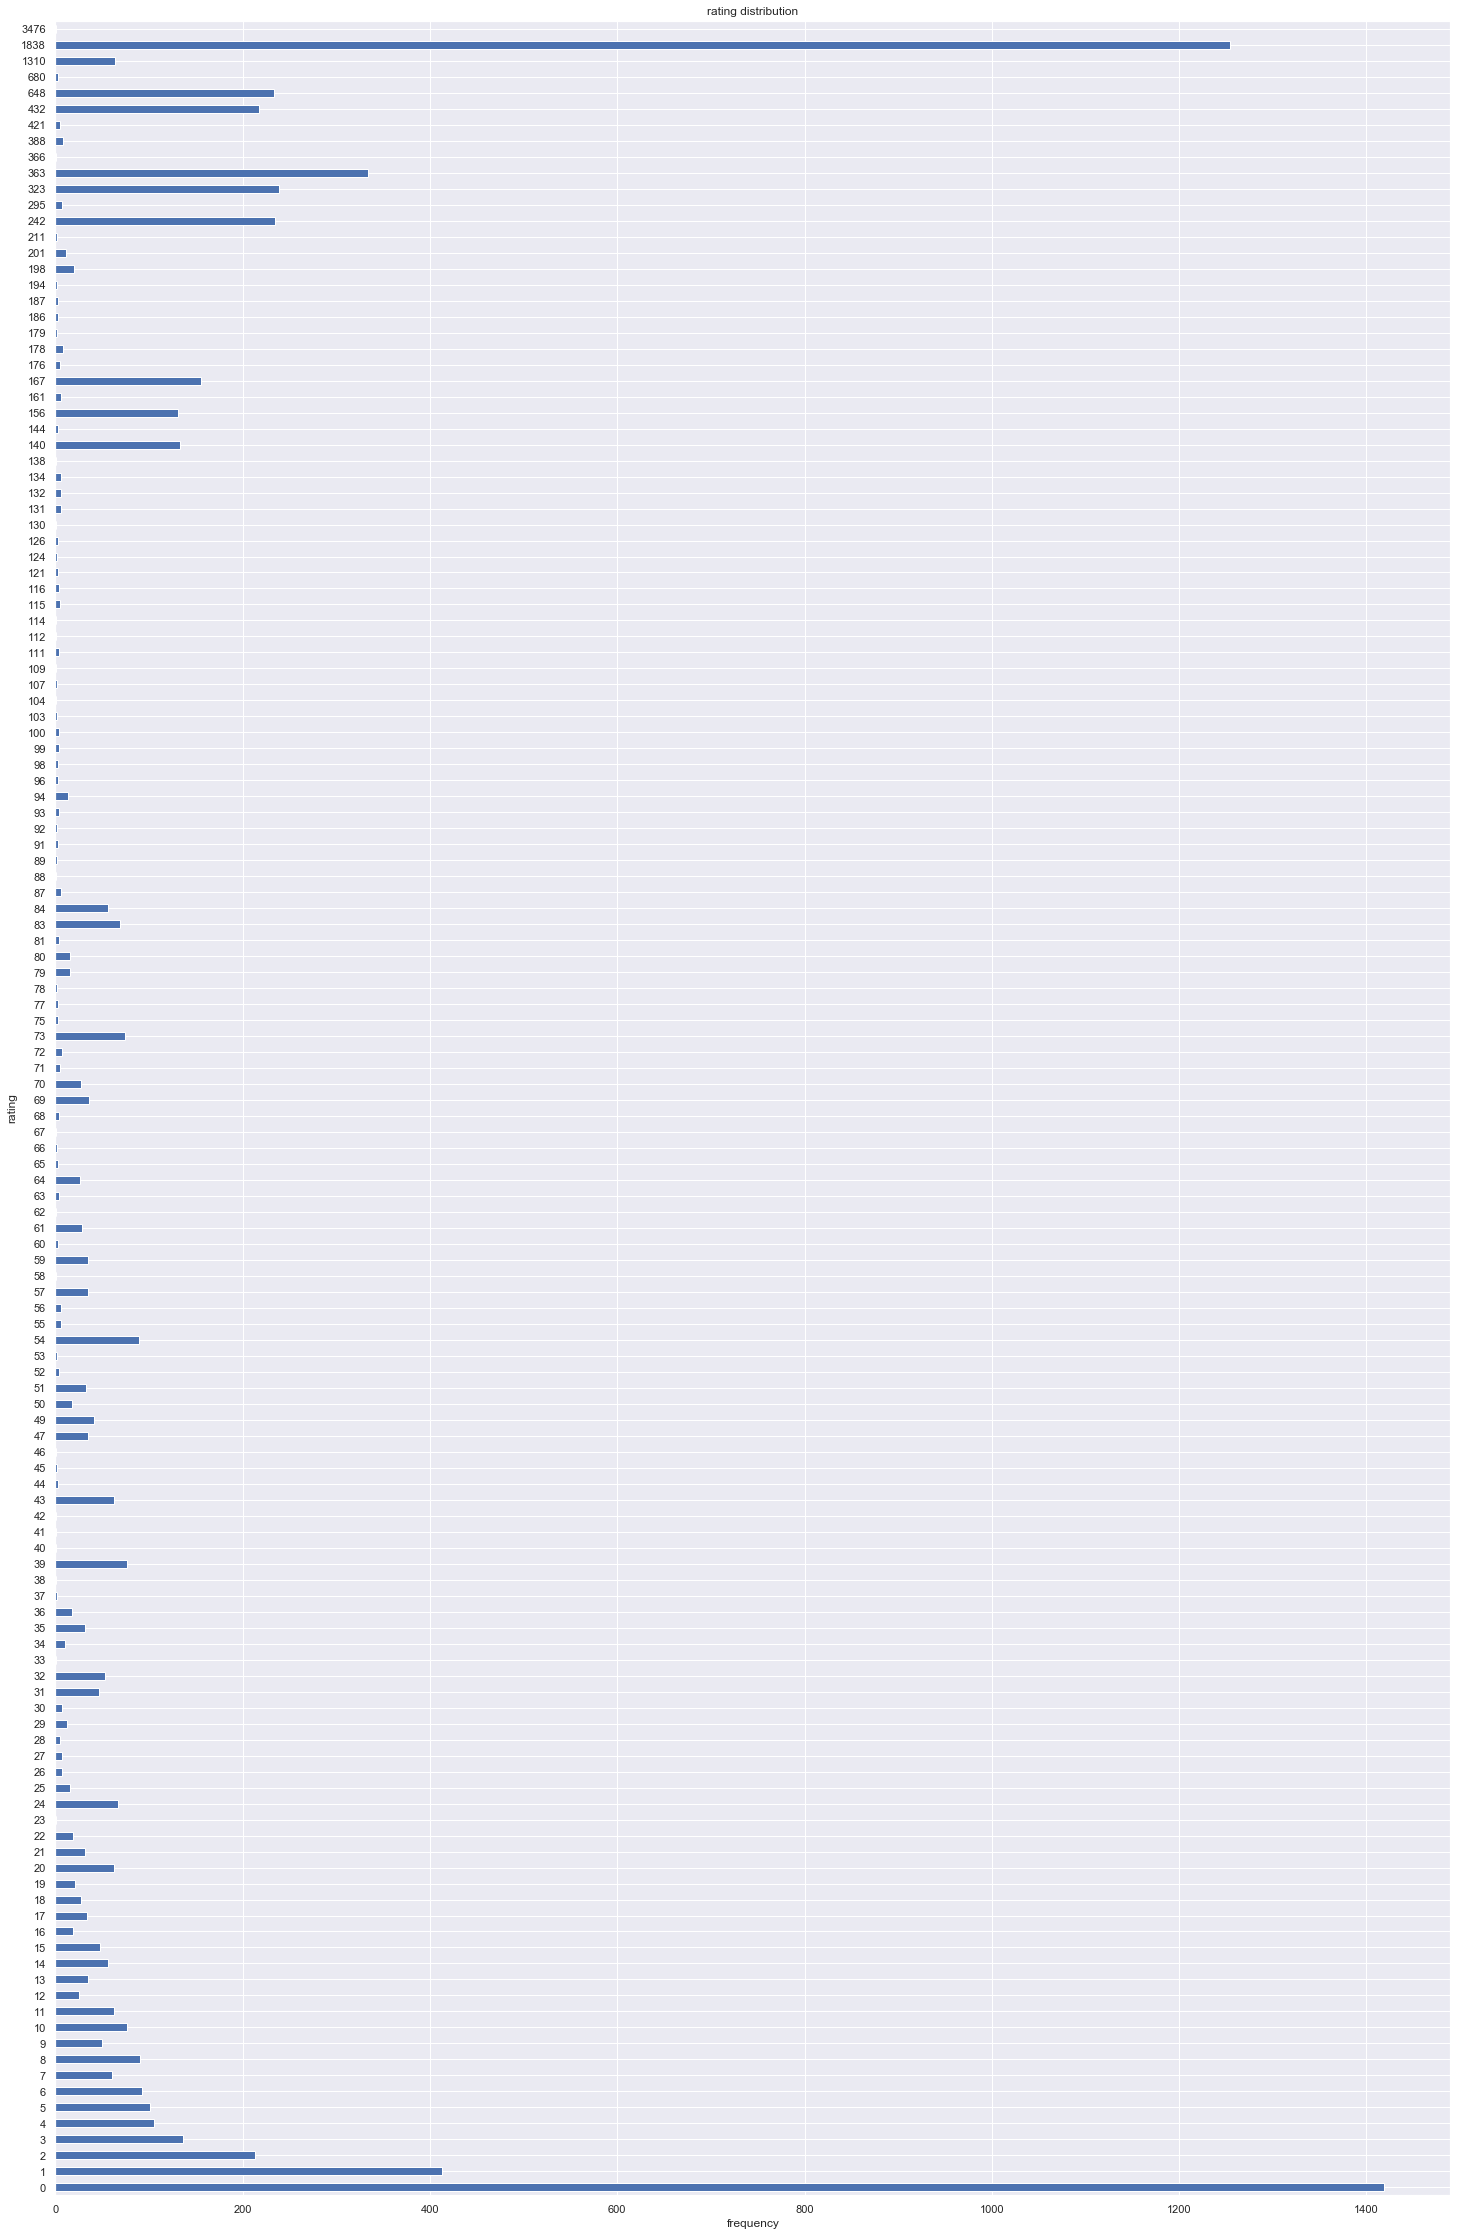

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize = (25, 40))

rating_distribution.plot.barh(stacked = True)
plt.title("rating distribution")
plt.xlabel("frequency")
plt.show()

#### from the above plot it is clear that quite a few tweets have not been retweeted, which is quite obvious. But its quite surprising to see a some of the tweets have been retweeted a lot of times. With the highest being 3476 times.
#### I wonder what those tweet are !!!

#### part 2 of the assesment

#### Extract the most important "keywords" or "key phrases" in the reviews you fetch. They don't have to be per comment, but have to be the most important keywords or phrases per selected social post. In essence, reading the list of keywords or phrases you extract should give a reader a rough insight into what people are discussing in the comments without reading all the comments.

#### The idea that has been discussed in this question is called topic modeling. We will be using LDA in our code to generate the set of important word from each tweet which will be able to give us an idea about the topic discussed in the tweets 

#### We will be using the below class for carrying all the text pre-processing stuff throughout the project

In [20]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

class TextProcessor:

    def __init__(self):
        self.stopwords = stopwords.words('english')
        self.ps = PorterStemmer()

        # stemmer will be used for each unique word once
        self.stemmed = dict()

        ## Below function is being used for removing non alphabets i.e. numerics and special charecters
        ## convertion to lowercase letters
        ## remove stop words
        ## remove HTML tags and stemming words
        
        ## some stop words can be allowed if it's felt it carries information in that case we can use the allow_stopwords function
        
    def process(self, text: str, allow_stopwords: bool = False) -> str:
        ret = []

        # split and cast to lower case
        text = re.sub(r'<[^>]+>', ' ', str(text))
        for word in re.split('[^a-zA-Z]', str(text).lower()):
            self .stopwords.append('rt')
            # remove non-alphabetic and stop words
            if (word.isalpha() and word not in self.stopwords) or allow_stopwords:
                
                if word not in self.stemmed:
                    self.stemmed[word] = self.ps.stem(word)
                    
                # use stemmed version of word
                ret.append(self.stemmed[word])
        return ' '.join(ret) ## for getting the splitted and transformed words back in one line

In [21]:
tp = TextProcessor()
tweets_retweet_count['post'] = tweets_retweet_count['post'].apply(tp.process)

C:\Users\Abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
tweets_retweet_count['post'][1]

'thereddiva downtown chicago back let tell middl day anyth empti drive'

#### Now using these list of words we will try to properly create clean sentences and tokenize them

In [23]:
def nlp_preprocessing(data):
    
    def token_filter(token):
        
        return not token.is_stop and token.is_alpha 
    
    data = [re.compile(r'<[^>]+>').sub('', x) for x in data] #Remove HTML-tags
    processed_tokens = []
    data_pipe = nlp.pipe(data)
    for doc in data_pipe:
        filtered_tokens = [token.lemma_.lower() for token in doc if token_filter(token)]
        processed_tokens.append(filtered_tokens)
    return processed_tokens

In [24]:
tweets_retweet_count['nlp_tokens'] = nlp_preprocessing(tweets_retweet_count['post'])

C:\Users\Abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Next we will be using gensims and LDA for our topic modeling

In [25]:
## setting gensims filter

extremes_no_below = 10 ## tokens should be no below atleast 10 in the corpus
extremes_no_above = 0.3 ## percentage of a particukar token to the whole corpus
extremes_keep_n = 2000 ## keep the n most frequent tokens

## setting filters for LDA model
num_topics = 4 ## The number of requested latent topics to be extracted from the training corpus
passes = 4 ## Number of passes through the corpus during training
chunksize = 200 ## Number of documents to be used in each training chunk
alpha = 1/15 ## Default prior set

In [26]:
seed = 13
random.seed(seed)
np.random.seed(seed)

lda_tokens = tweets_retweet_count['nlp_tokens']


## Gensim Dictionary

lda_dic = gensim.corpora.Dictionary(lda_tokens)
lda_dic.filter_extremes(no_below=extremes_no_below, no_above=extremes_no_above, keep_n=extremes_keep_n)

lda_corpus = [lda_dic.doc2bow(doc) for doc in lda_tokens]

lda_tfidf = gensim.models.TfidfModel(lda_corpus)

lda_corpus = lda_tfidf[lda_corpus]

# Create LDA Model
lda_model = gensim.models.ldamodel.LdaModel(lda_corpus, num_topics=num_topics, 
                                            id2word = lda_dic, passes=passes,
                                            chunksize=chunksize,update_every=0,
                                            alpha=alpha, random_state=seed)

## Visualizing using word cloud

In [27]:
def get_model_wordcloud(ldamodel):
    """ Create a Word Cloud for each topic of the LDA model

    """ 
    topics = 'Wordclouds for the 4 different topics'
    plot_cols = 2
    plot_rows = math.ceil(num_topics / 2)
    axisNum = 0
    plt.figure(figsize=(15, 10))
    for topicID in range(ldamodel.state.get_lambda().shape[0]):
        #gather most relevant terms for the given topic
        topics_terms = ldamodel.state.get_lambda()
        tmpDict = {}
        for i in range(1, len(topics_terms[0])):
            tmpDict[ldamodel.id2word[i]]=topics_terms[topicID,i]

        # draw the wordcloud
        wordcloud = WordCloud( margin=0,max_words=20 ).generate_from_frequencies(tmpDict)
        axisNum += 1
        ax = plt.subplot(plot_rows, plot_cols, axisNum)

        plt.imshow(wordcloud, interpolation='bilinear')
        title = topicID
        plt.title(title)
        plt.suptitle(topics)
        plt.axis("off")
        plt.margins(x=0, y=0)
    plt.show()

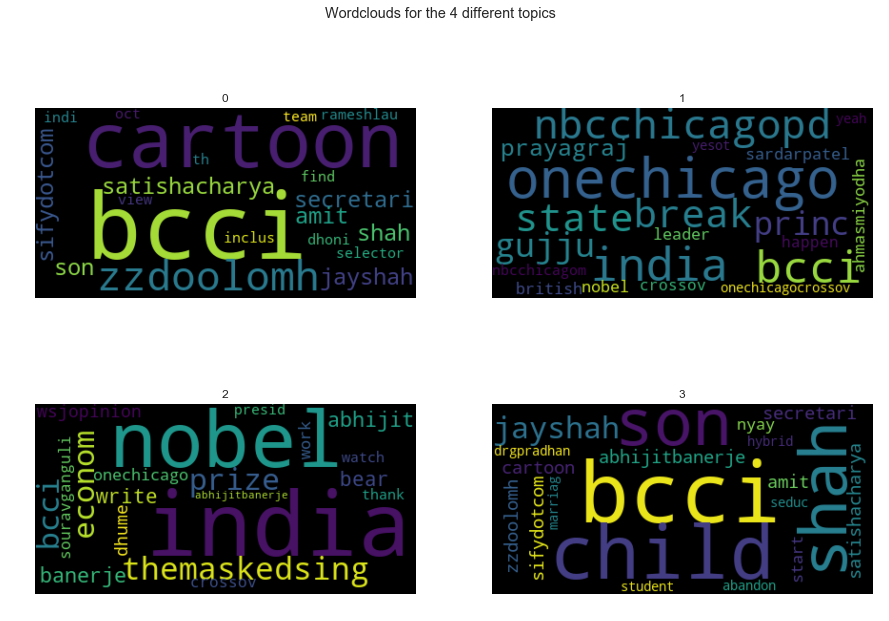

In [28]:
get_model_wordcloud(lda_model)

#### Now we will use a function developed below to check which topic a given input gets most correlated with

#### It will be giving soft probabilities so we will be able to say that the topic with most probability is the class it is most assciated with

#### Also from the word clouds we can make out only 3 dominant topics BCCI Nobel and One Chicago but not the other one. This is because of the lack of data as well as unbalnced data in our dataset

In [31]:
def get_text_topics(text, top):
  
    def token_topic(token):
        return topic_words.get(token, -1)
    
    
    nlp_tokens = nlp_preprocessing([text])

    bow_text = [lda_dic.doc2bow(doc) for doc in nlp_tokens]
    bow_text = lda_tfidf[bow_text]
    topic_text = lda_model.get_document_topics(bow_text)
    topic_text = pd.DataFrame.from_records([{v:k for v, k in row} for row in topic_text])
    
    #print('Text:')
    topic_words = []
    topic_labeled = 0
    for topic in topic_text.columns.values:
        topic_terms = lda_model.get_topic_terms(topic, top)
        topic_words = topic_words+[[topic_labeled, lda_dic[pair[0]], pair[1]] for pair in topic_terms]
        topic_labeled += 1
    topic_words = pd.DataFrame(topic_words, columns=['topic', 'word', 'value']).pivot(index='word', columns='topic', values='value').idxmax(axis=1)
    nlp_doc = nlp(text)
#     text_highlight = ''.join([x.string if token_topic(x.lemma_.lower()) <0  else colors[token_topic(x.lemma_.lower()) % len(colors)] + x.string + '\033[0m' for x in nlp_doc])
    #print(text_highlight) 
    
    #print('\nTopics:')
    topic_labeled = 0
    topic_proba = []
    for topic in topic_text:
        
        topic_proba.append(topic_text[topic].values[0])
        
        topic_labeled += 1
    val, idx = max((val, idx) for (idx, val) in enumerate(topic_proba))
    return idx

In [32]:
query_text = 'Indian wins Nobel Prize'
get_text_topics(query_text, 10)

2

#### Now let us use the original dataframe that we had and see if our model is able to classify each of the tweet to diffent topics and then using the rating we can check which topic has the most rating and average ratings as well

In [33]:
topic_pred = []

for tweet in tweets_retweet_count['post']:
    topic_pred.append(get_text_topics(tweet, 10))
#     print(tweet)
#     print(get_text_topics(tweet, 10))

In [34]:
tweets_retweet_count['topic_pred'] = topic_pred

C:\Users\Abhis\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Checking how many tweets were classified into each topic

In [39]:
topic_wise_Tweets = tweets_retweet_count.groupby('topic_pred')['topic_pred'].count()
print(topic_wise_Tweets)

topic_pred
0    2260
1    2032
2    1901
3    1306
Name: topic_pred, dtype: int64


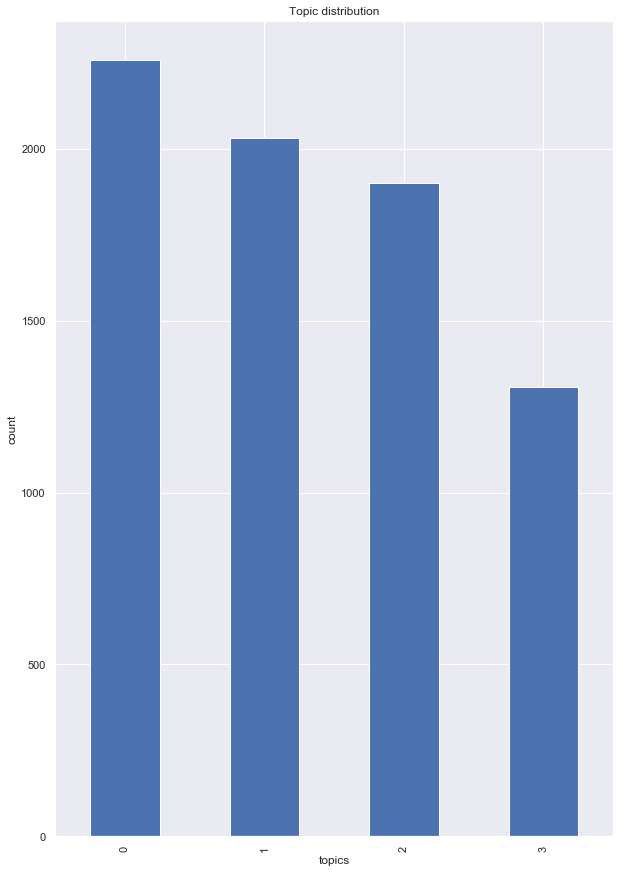

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize = (10, 15))

topic_wise_Tweets.plot.bar(stacked = True)
plt.title("Topic distribution")
plt.xlabel("topics")
plt.ylabel("count")
plt.show()

#### Though the original toopics that were collected were not equally distributed but our model has predicted most tweets into topic 0 followed by the others. Also topic 1 and 2 counts are quite close to each other. Least number of tweets have been mapped to topic 4, this is quite obvious as from the word cloud we had already see that topic 4 words were overlapping a lot with the other topics.

#### Trying to predict whic topic has highest ratings using our predicted topics

In [35]:
topic_mostRetweeted = tweets_retweet_count.groupby('topic_pred')['rating'].agg('sum')
print(topic_mostRetweeted)

topic_pred
0    2580468
1     143976
2     187033
3     149176
Name: rating, dtype: int64


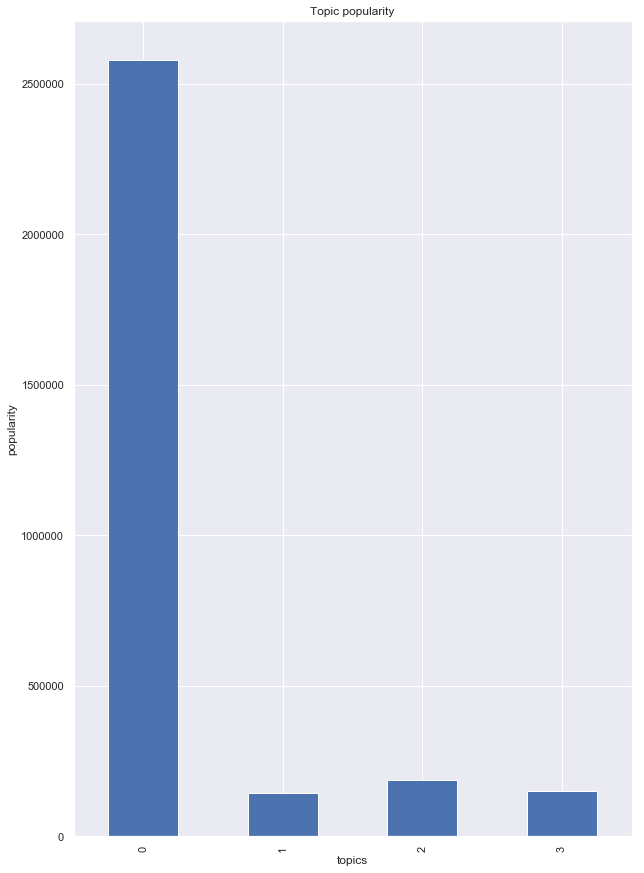

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

fig = plt.figure(figsize = (10, 15))

topic_mostRetweeted.plot.bar(stacked = True)
plt.title("Topic popularity")
plt.xlabel("topics")
plt.ylabel("popularity")
plt.show()

#### Above plot shows that topic 0 is the most popular. This is also because that topic 0 data could be over powering the other classes.

## Inferences

#### 1. Data collected was unbalanced and therefore the outcomes seems to be partial towards some of the classes
#### 2. We can try collecting some more data on variaous different topics and further research on topic modeling
#### 3. The tokens getting generated are quite generic and overlapping maybe thats why our model is not performing that well
#### 4. We could research more on this an try to play around a bit with the hyper parameters in order to check if we could get some different results
#### 5. Try to find some better ways to check if there are better ways to classify similar words used in different sentences in different contexts
#### 6: 